This is research to test whether protein foods are
impacted the household expenditure in West Java, Indonesia. The
test uses regression calculations by taking
sample data from 2018 to 2022. The data is
downloaded from the Jabar dataset
websites

**Import Libraries**

In [ ]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from math import log
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.stattools import jarque_bera
%matplotlib inline

**Get the Data**

In [ ]:
expenditure_jabar=pd.read_csv("/content/Pengeluaran vs Rata-rata Konsumsi Perkapita Seminggu Telur  Susu & Daging 2018-2022 detail.csv")

In [ ]:
expenditure_jabar.head()

,Telur ayam ras,Telur ayam kampung,Telur itik/telur itik manila,"Telur lainnya (telur puyuh, telur asin mentah maupun matang, telur penyu, telur angsa, dsb)",Susu cair pabrik,Susu kental manis,Susu bubuk,Susu bubuk bayi,Susu lainnya dan hasil lain dari susu,Daging sapi,"Daging kambing, domba/biri-biri",Daging babi,Daging ayam ras,Daging ayam kampung,Daging segar lainnya,Daging diawetkan lainnya,"Tetelan, sandung lamur","Lainnya ( hati, jeroan, iga, kaki, buntut, kepala, dsb)",pengeluaran
0,2.471,0.028,0.007,0.032,0.121,0.114,0.023,0.012,0.009,0.014,0.001,0.002,0.135,0.004,0.001,0.001,0.002,0.008,10323
1,2.488,0.026,0.010,0.039,0.083,0.077,0.005,0.006,0.041,0.005,0.001,0.000,0.142,0.011,0.001,0.001,0.001,0.007,8618
2,2.230,0.040,0.038,0.065,0.084,0.086,0.005,0.007,0.061,0.007,0.003,0.001,0.111,0.020,0.001,0.001,0.001,0.005,7874
3,2.700,0.019,0.046,0.062,0.147,0.102,0.007,0.018,0.070,0.013,0.000,0.000,0.166,0.009,0.001,0.002,0.001,0.013,10203
4,2.163,0.035,0.037,0.038,0.082,0.080,0.007,0.005,0.051,0.004,0.001,0.001,0.127,0.011,0.002,0.001,0.000,0.007,7597


In [ ]:
expenditure_jabar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 19 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Telur ayam ras                                                                               135 non-null    float64
 1   Telur ayam kampung                                                                           135 non-null    float64
 2   Telur itik/telur itik manila                                                                 135 non-null    float64
 3   Telur lainnya (telur puyuh, telur asin mentah maupun matang, telur penyu, telur angsa, dsb)  135 non-null    float64
 4   Susu cair pabrik                                                                             135 non-null    float64
 5   Susu kental manis                   

**Describe about table**

In [ ]:
expenditure_jabar.describe()

,Telur ayam ras,Telur ayam kampung,Telur itik/telur itik manila,"Telur lainnya (telur puyuh, telur asin mentah maupun matang, telur penyu, telur angsa, dsb)",Susu cair pabrik,Susu kental manis,Susu bubuk,Susu bubuk bayi,Susu lainnya dan hasil lain dari susu,Daging sapi,"Daging kambing, domba/biri-biri",Daging babi,Daging ayam ras,Daging ayam kampung,Daging segar lainnya,Daging diawetkan lainnya,"Tetelan, sandung lamur","Lainnya ( hati, jeroan, iga, kaki, buntut, kepala, dsb)",pengeluaran
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,2.512052,0.036022,0.019600,0.114985,0.169052,0.091985,0.014519,0.012030,0.033400,0.011496,0.000622,0.000511,0.152526,0.011289,0.001548,0.005370,0.001933,0.009637,10836.451852
std,0.340430,0.028989,0.018308,0.082014,0.105671,0.024445,0.009103,0.005124,0.022317,0.007257,0.000752,0.000752,0.030633,0.009074,0.001606,0.008573,0.001866,0.004932,2259.132602
min,1.775000,0.003000,0.000000,0.002000,0.036000,0.045000,0.002000,0.003000,0.002000,0.001000,0.000000,0.000000,0.083000,0.001000,0.000000,0.000000,0.000000,0.002000,7597.000000
25%,2.238500,0.018500,0.006500,0.055000,0.083500,0.076500,0.008000,0.008000,0.015500,0.006000,0.000000,0.000000,0.129000,0.006000,0.001000,0.001000,0.001000,0.006000,9412.500000
50%,2.494000,0.026000,0.014000,0.090000,0.137000,0.087000,0.012000,0.011000,0.030000,0.009000,0.000000,0.000000,0.151000,0.009000,0.001000,0.002000,0.001000,0.009000,10414.000000
75%,2.740500,0.042500,0.027000,0.159500,0.232000,0.102500,0.019500,0.014500,0.043000,0.014500,0.001000,0.001000,0.172500,0.013000,0.002000,0.007500,0.003000,0.013000,11612.000000
max,3.445000,0.177000,0.120000,0.432000,0.462000,0.192000,0.045000,0.027000,0.134000,0.039000,0.004000,0.004000,0.233000,0.055000,0.008000,0.056000,0.008000,0.027000,17639.000000


**Shape of table**

In [ ]:
expenditure_jabar.shape

(135, 19)

**Describe about null data**

In [ ]:
print(expenditure_jabar.isnull().sum())

Telur ayam ras                                                                                 0
Telur ayam kampung                                                                             0
Telur itik/telur itik manila                                                                   0
Telur lainnya (telur puyuh, telur asin mentah maupun matang, telur penyu, telur angsa, dsb)    0
Susu cair pabrik                                                                               0
Susu kental manis                                                                              0
Susu bubuk                                                                                     0
Susu bubuk bayi                                                                                0
Susu lainnya dan hasil lain dari susu                                                          0
Daging sapi                                                                                    0
Daging kambing, domba/biri-bir

**Describe about duplicated data**

In [ ]:
expenditure_jabar.duplicated().sum()

0

**EXPLORATORY DATA ANALYSIS**

**Correlation entire variables using heatmap**

,Telur ayam ras,Telur ayam kampung,Telur itik/telur itik manila,"Telur lainnya (telur puyuh, telur asin mentah maupun matang, telur penyu, telur angsa, dsb)",Susu cair pabrik,Susu kental manis,Susu bubuk,Susu bubuk bayi,Susu lainnya dan hasil lain dari susu,Daging sapi,"Daging kambing, domba/biri-biri",Daging babi,Daging ayam ras,Daging ayam kampung,Daging segar lainnya,Daging diawetkan lainnya,"Tetelan, sandung lamur","Lainnya ( hati, jeroan, iga, kaki, buntut, kepala, dsb)",pengeluaran
Telur ayam ras,1.000000,-0.405837,-0.425543,0.191729,0.637227,-0.133588,0.560146,0.389699,0.265581,0.671990,-0.251363,0.131083,0.694052,-0.498396,0.422487,0.543289,0.399120,0.461033,0.682825
Telur ayam kampung,-0.405837,1.000000,0.228556,0.136490,-0.207873,0.053382,-0.241044,-0.202682,-0.153142,-0.115973,0.119210,0.110078,-0.103447,0.759648,-0.044195,-0.086548,-0.106634,-0.130177,-0.180519
Telur itik/telur itik manila,-0.425543,0.228556,1.000000,-0.177327,-0.368455,0.308248,-0.349014,-0.037344,-0.058164,-0.397451,-0.039799,-0.041425,-0.361121,0.352482,-0.249414,-0.310837,-0.291819,-0.142544,-0.284542
"Telur lainnya (telur puyuh, telur asin mentah maupun matang, telur penyu, telur angsa, dsb)",0.191729,0.136490,-0.177327,1.000000,0.530084,0.142746,0.438215,0.171589,0.155593,0.466739,-0.130690,0.175990,0.258027,-0.062968,0.378468,0.232603,0.341357,0.236981,0.508335
Susu cair pabrik,0.637227,-0.207873,-0.368455,0.530084,1.000000,-0.046478,0.809059,0.368133,0.251457,0.820183,-0.292936,0.151000,0.662576,-0.341582,0.636825,0.495469,0.624533,0.471928,0.784975
Susu kental manis,-0.133588,0.053382,0.308248,0.142746,-0.046478,1.000000,0.129421,0.056726,0.055167,-0.063814,-0.103046,-0.023950,-0.150039,-0.029889,-0.051890,-0.124046,0.096851,-0.037372,0.010844
Susu bubuk,0.560146,-0.241044,-0.349014,0.438215,0.809059,0.129421,1.000000,0.517275,0.148041,0.767042,-0.279772,0.121287,0.569836,-0.360859,0.532878,0.481036,0.727105,0.308258,0.811395
Susu bubuk bayi,0.389699,-0.202682,-0.037344,0.171589,0.368133,0.056726,0.517275,1.000000,0.097073,0.445937,-0.361301,0.209151,0.315042,-0.267111,0.188511,0.187999,0.399923,0.169946,0.483470
Susu lainnya dan hasil lain dari susu,0.265581,-0.153142,-0.058164,0.155593,0.251457,0.055167,0.148041,0.097073,1.000000,0.279186,-0.067877,0.125168,0.236257,-0.196512,0.269377,0.155757,0.175224,0.393508,0.230324
Daging sapi,0.671990,-0.115973,-0.397451,0.466739,0.820183,-0.063814,0.767042,0.445937,0.279186,1.000000,-0.222526,0.223985,0.731985,-0.203336,0.543274,0.576267,0.698593,0.410607,0.791976


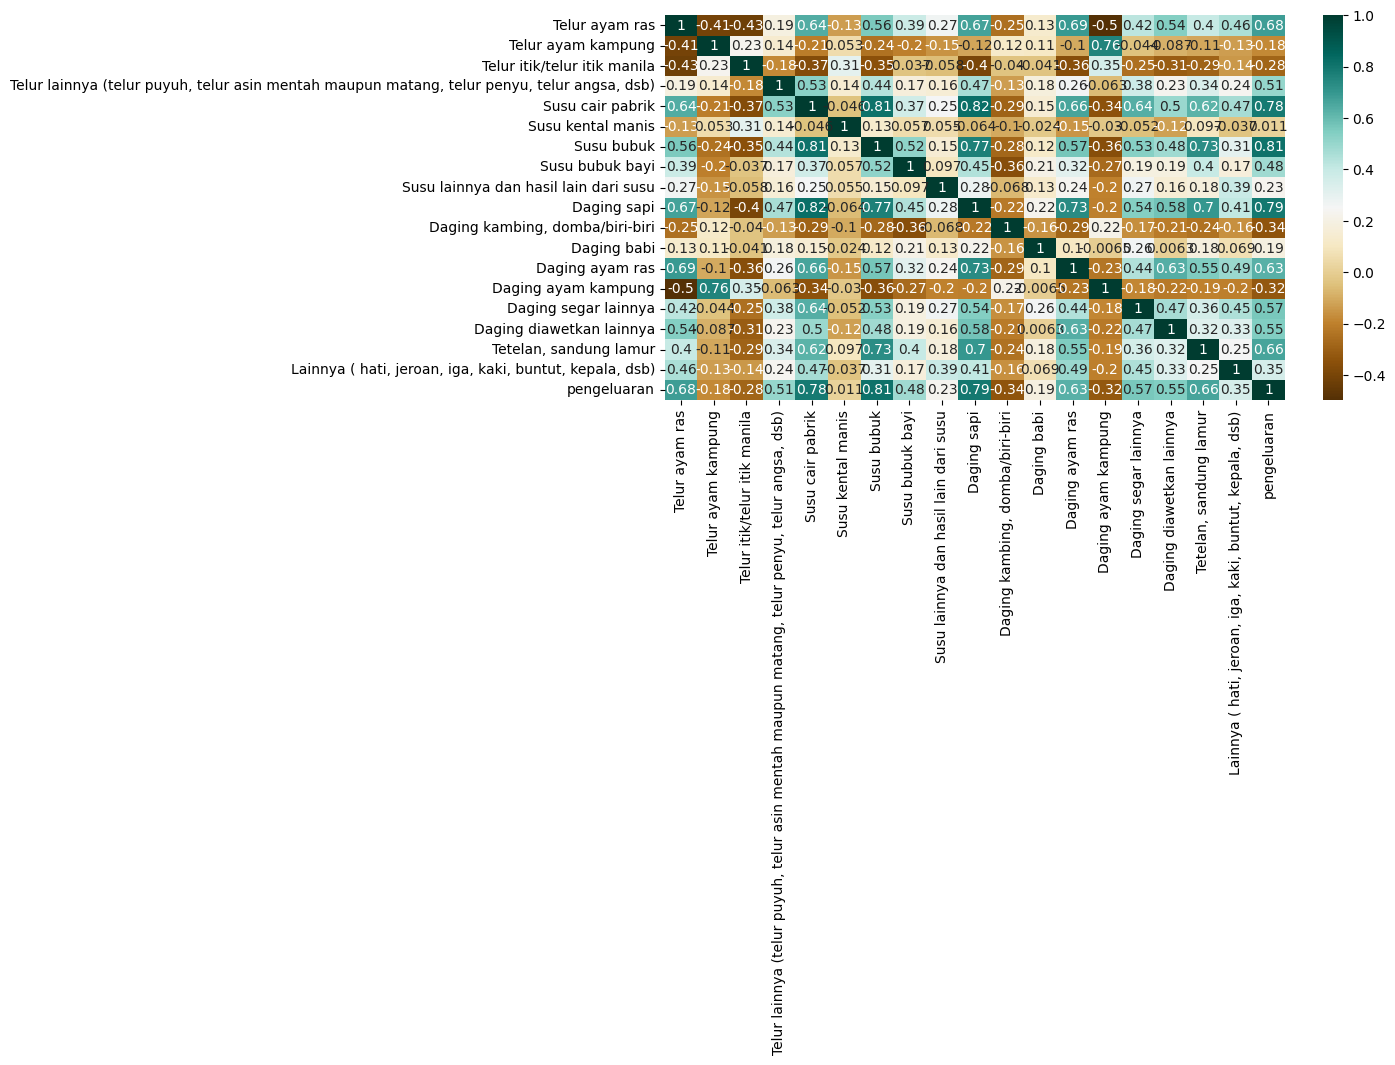

In [ ]:
plt.figure(figsize=(10,5))
c = expenditure_jabar.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

**Correlation entire variables using pairplot**

In [ ]:
sns.pairplot(expenditure_jabar)

Output hidden; open in https://colab.research.google.com to view.

**A Linear Model plot using beef vs stunting**

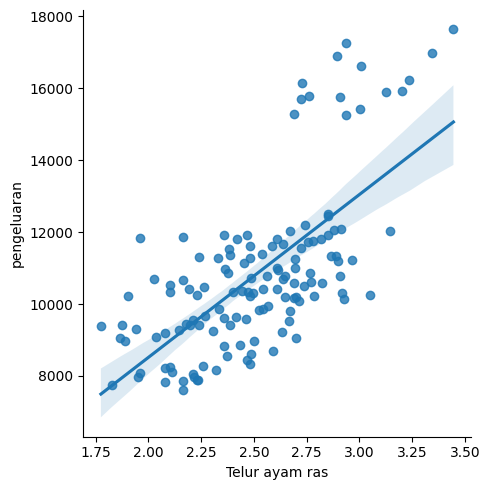

In [ ]:
sns.lmplot(x='Telur ayam ras', y="pengeluaran", data=expenditure_jabar)

In [ ]:
X=expenditure_jabar.drop(['pengeluaran'],axis=1).values
X

array([[2.471e+00, 2.800e-02, 7.000e-03, ..., 1.000e-03, 2.000e-03,
        8.000e-03],
       [2.488e+00, 2.600e-02, 1.000e-02, ..., 1.000e-03, 1.000e-03,
        7.000e-03],
       [2.230e+00, 4.000e-02, 3.800e-02, ..., 1.000e-03, 1.000e-03,
        5.000e-03],
       ...,
       [2.852e+00, 2.100e-02, 8.000e-03, ..., 3.400e-02, 1.000e-03,
        2.300e-02],
       [2.688e+00, 2.200e-02, 2.200e-02, ..., 1.200e-02, 0.000e+00,
        5.000e-03],
       [2.364e+00, 2.800e-02, 1.100e-02, ..., 1.100e-02, 4.000e-03,
        1.400e-02]])

In [ ]:
y=expenditure_jabar['pengeluaran'].values
y

array([10323,  8618,  7874, 10203,  7597,  7761,  9190,  9297, 10212,
        9416, 10153,  9633, 10715, 11372, 11277, 11155,  8329,  8968,
       11348, 10609, 16630, 11397, 15755, 15262, 11921,  9855, 10329,
       10683,  8973,  8290, 10502,  8099,  8092,  9557,  9673, 10670,
        9822, 10406, 10090, 11012, 11819, 11856, 11610,  8684,  9423,
       11825, 11204, 17254, 11930, 16157, 15696, 12448, 10414, 10705,
       10317,  8823,  7980, 10201,  7876,  7852,  9288,  9459, 10342,
        9521, 10217,  9859, 10790, 11614, 11315, 11241,  8455,  9084,
       11564, 10999, 16887, 11800, 15776, 15281, 12025, 10263, 10535,
       10410,  8850,  8052, 10307,  7961,  7829,  9259,  9409, 10368,
        9591, 10262,  9810, 10854, 11669, 11522, 11341,  8546,  9065,
       11716, 10942, 16996, 11810, 15903, 15420, 12019, 10213, 10476,
       10860,  9210,  8244, 10588,  8227,  8177,  9428,  9620, 10791,
        9950, 10776, 10166, 11294, 12193, 11927, 11757,  9044,  9389,
       12058, 11229,

**Training and Testing Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

**Create a formula Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

**Train/fit on training data**

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

**Print Coefficient of Model**

In [ ]:
lm.coef_

array([  2882.97701129,  -3387.51349131,  16522.28375667,   5334.53095827,
         1679.83021104,  -4590.02191594,  70443.37025923,   1058.71483863,
         2713.13863617,  20175.80913365, -84425.28380874,  77670.98350477,
        -2578.74861696,  26590.65829369, 143848.91501124,  14427.37151627,
       137440.74671887, -32871.93766853])

In [ ]:
prediction = lm.predict(X_test)
prediction

array([ 9992.3854936 ,  8836.95561442, 10228.60576095, 11520.45992933,
        8836.00100515,  8577.22890912, 10147.88769754, 15139.74731151,
       14737.14150051,  8891.24721316, 12316.9521499 ,  9193.80116   ,
       12398.65099672, 15337.26112006,  9622.45943563, 10173.39127357,
        9644.13693542,  9213.49217779, 15466.09028422, 10352.0311736 ,
        8073.27083273,  9341.5837323 ,  9496.56821609, 11056.6330975 ,
        9694.63746582, 12087.24564506,  9484.81297015,  9262.86987256,
       13404.5267941 , 10595.10526569,  7724.33674058, 15220.81211825,
       10439.63722083,  9877.4496306 ,  9588.92702394,  8506.96432842,
        8764.08724565,  7960.65355674, 12158.73448175, 11376.22124432,
        9030.75545127])

Text(0, 0.5, 'predicted values')

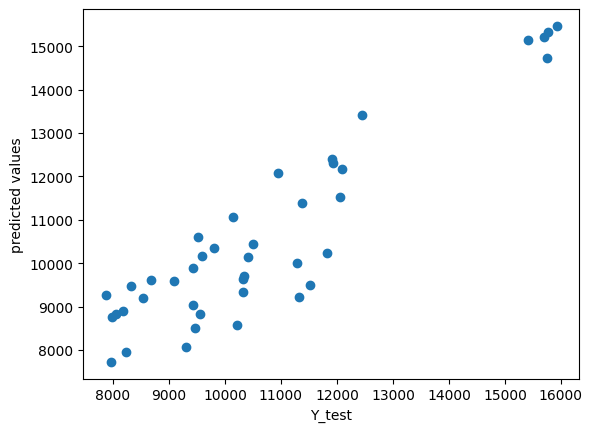

In [ ]:
plt.scatter(y_test, prediction)
plt.xlabel("Y_test")
plt.ylabel('predicted values')

**Evaluation The Model**

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE',metrics.mean_absolute_error(y_test, prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 775.8179336965302
MSE 843084.2364555347
RMSE 918.1961862562569


**R^ Value **

In [ ]:
metrics.explained_variance_score(y_test,prediction)

0.8386256998968423

In [ ]:
new_df = pd.DataFrame({"Actual":y_test,"Predicted":prediction})
new_df

,Actual,Predicted
0,11294,9992.385494
1,9557,8836.955614
2,11825,10228.605761
3,12058,11520.459929
4,8052,8836.001005
5,10212,8577.228909
6,10414,10147.887698
7,15420,15139.747312
8,15755,14737.141501
9,8177,8891.247213


**Conclusion**

In [ ]:
X = expenditure_jabar.drop(["pengeluaran"],axis=1)
X.head()

,Telur ayam ras,Telur ayam kampung,Telur itik/telur itik manila,"Telur lainnya (telur puyuh, telur asin mentah maupun matang, telur penyu, telur angsa, dsb)",Susu cair pabrik,Susu kental manis,Susu bubuk,Susu bubuk bayi,Susu lainnya dan hasil lain dari susu,Daging sapi,"Daging kambing, domba/biri-biri",Daging babi,Daging ayam ras,Daging ayam kampung,Daging segar lainnya,Daging diawetkan lainnya,"Tetelan, sandung lamur","Lainnya ( hati, jeroan, iga, kaki, buntut, kepala, dsb)"
0,2.471,0.028,0.007,0.032,0.121,0.114,0.023,0.012,0.009,0.014,0.001,0.002,0.135,0.004,0.001,0.001,0.002,0.008
1,2.488,0.026,0.010,0.039,0.083,0.077,0.005,0.006,0.041,0.005,0.001,0.000,0.142,0.011,0.001,0.001,0.001,0.007
2,2.230,0.040,0.038,0.065,0.084,0.086,0.005,0.007,0.061,0.007,0.003,0.001,0.111,0.020,0.001,0.001,0.001,0.005
3,2.700,0.019,0.046,0.062,0.147,0.102,0.007,0.018,0.070,0.013,0.000,0.000,0.166,0.009,0.001,0.002,0.001,0.013
4,2.163,0.035,0.037,0.038,0.082,0.080,0.007,0.005,0.051,0.004,0.001,0.001,0.127,0.011,0.002,0.001,0.000,0.007


In [ ]:
y = expenditure_jabar['pengeluaran']
y.head()

0    10323
1     8618
2     7874
3    10203
4     7597
Name: pengeluaran, dtype: int64

In [ ]:
X = sm.add_constant(X)
X.head()

,const,Telur ayam ras,Telur ayam kampung,Telur itik/telur itik manila,"Telur lainnya (telur puyuh, telur asin mentah maupun matang, telur penyu, telur angsa, dsb)",Susu cair pabrik,Susu kental manis,Susu bubuk,Susu bubuk bayi,Susu lainnya dan hasil lain dari susu,Daging sapi,"Daging kambing, domba/biri-biri",Daging babi,Daging ayam ras,Daging ayam kampung,Daging segar lainnya,Daging diawetkan lainnya,"Tetelan, sandung lamur","Lainnya ( hati, jeroan, iga, kaki, buntut, kepala, dsb)"
0,1.0,2.471,0.028,0.007,0.032,0.121,0.114,0.023,0.012,0.009,0.014,0.001,0.002,0.135,0.004,0.001,0.001,0.002,0.008
1,1.0,2.488,0.026,0.010,0.039,0.083,0.077,0.005,0.006,0.041,0.005,0.001,0.000,0.142,0.011,0.001,0.001,0.001,0.007
2,1.0,2.230,0.040,0.038,0.065,0.084,0.086,0.005,0.007,0.061,0.007,0.003,0.001,0.111,0.020,0.001,0.001,0.001,0.005
3,1.0,2.700,0.019,0.046,0.062,0.147,0.102,0.007,0.018,0.070,0.013,0.000,0.000,0.166,0.009,0.001,0.002,0.001,0.013
4,1.0,2.163,0.035,0.037,0.038,0.082,0.080,0.007,0.005,0.051,0.004,0.001,0.001,0.127,0.011,0.002,0.001,0.000,0.007


In [ ]:
OLS =  sm.OLS(endog = y, exog = X).fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            pengeluaran   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     28.68
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           2.26e-34
Time:                        09:02:53   Log-Likelihood:                -1119.2
No. Observations:                 135   AIC:                             2276.
Df Residuals:                     116   BIC:                             2332.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================================================
                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                        3304.2303   1250.070      2.643      0.009     828.309    5780.151
Telur ayam ras                                                                               2287.9864    486.528      4.703      0.000    1324.357    3251.616
Telur ayam kampung                                                                           3777.5353   5287.831      0.714      0.476   -6695.681    1.43e+04
Telur itik/telur itik manila                                                                 1.666e+04   6421.064      2.595      0.011    3945.655    2.94e+04
Telur lainnya (telur puyuh, telur asin mentah maupun matang, telur penyu, telur angsa, dsb)  4982.3116   1438.840      3.463      0.001    2132.507    7832.116
Susu cair pabrik                                                                              322.9966   2105.766      0.153      0.878   -3847.738    4493.731
Susu kental manis                                                                           -6709.8484   4412.649     -1.521      0.131   -1.54e+04    2029.959
Susu bubuk                                                                                   8.666e+04   2.31e+04      3.745      0.000    4.08e+04    1.32e+05
Susu bubuk bayi                                                                              8847.9705   2.35e+04      0.377      0.707   -3.76e+04    5.53e+04
Susu lainnya dan hasil lain dari susu                                                        2109.7772   4610.552      0.458      0.648   -7022.003    1.12e+04
Daging sapi                                                                                  3.331e+04   3.11e+04      1.072      0.286   -2.83e+04    9.49e+04
Daging kambing, domba/biri-biri                                                             -1.863e+05   1.38e+05     -1.349      0.180    -4.6e+05    8.72e+04
Daging babi                                                                                 -4.046e+04   1.35e+05     -0.299      0.765   -3.08e+05    2.27e+05
Daging ayam ras                                                                             -3778.6242   5505.391     -0.686      0.494   -1.47e+04    7125.496
Daging ayam kampung                                                                         -5204.4372   1.81e+04     -0.288      0.774    -4.1e+04    3.06e+04
Daging segar lainnya                                                                         1.212e+05   8.17e+04      1.484      0.140   -4.05e+04    2.83e+05
Daging diawetkan lainnya                   